In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
# print first five rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and coloums in the dataframe
gold_data.shape

(2290, 6)

In [8]:
# to get some more info abt the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# to check no of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# to get statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
   1.Postive Correlation
   2.Negative Correlation

In [14]:
correlation=gold_data.corr()

<ipython-input-14-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

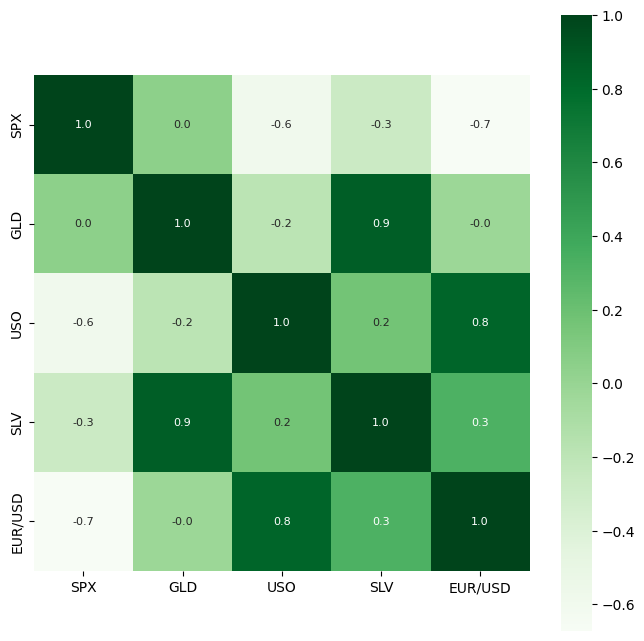

In [19]:
# to construct a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [20]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-21-71ae8341b557>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

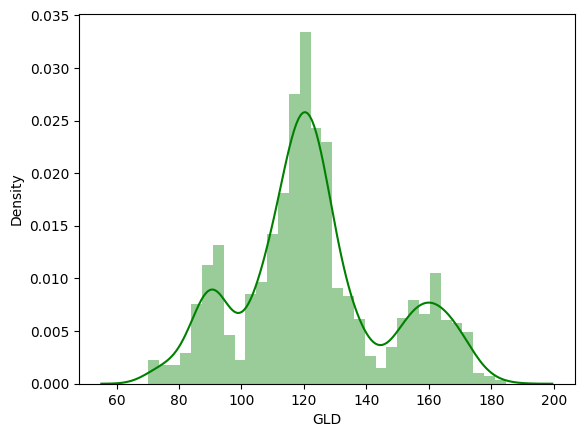

In [21]:
#check the dist of goldprice
sns.distplot(gold_data['GLD'],color='green')

Splitting the features and target

In [22]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [25]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training:
Radom Forest Regressor

In [29]:
regressor=RandomForestRegressor(n_estimators=100)

In [30]:
#to train the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [31]:
#to predict the test data
test_data_prediction=regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[168.90529956  82.02639985 116.32610037 127.71270095 120.82180098
 154.50129729 150.02489898 125.95200026 117.47269874 125.97910081
 116.50350131 170.92050098 141.70209811 168.13919844 115.20540009
 117.68950076 139.05120239 170.49790123 159.54180234 156.71929996
 155.12229973 125.3832     175.89449994 157.53890366 125.24400036
  93.80679979  77.46400026 120.30170024 119.06949915 167.41620042
  88.25000084 125.13329987  91.10790058 117.62240063 121.16979934
 136.22160024 115.60840127 115.02840083 148.65179917 107.55550104
 104.36780248  87.17929774 126.50880058 117.83099983 152.26879896
 119.56290016 108.34680014 107.92489809  93.20400038 127.07969809
  74.96450047 113.63589928 121.19579998 111.22459892 118.80949895
 120.85979938 159.58790017 170.31000107 147.18609678  85.84969843
  94.2962003   86.82699878  90.58899995 119.05230065 126.32490049
 127.53049976 169.57110051 122.24289915 117.41739876  98.44460042
 168.75610215 143.0719985  132.21980202 121.08370194 121.21829966
 119.61900

In [33]:
# r squared error
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9884889252603902


compare actual and predicted values in a plot



In [34]:
Y_test=list(Y_test)

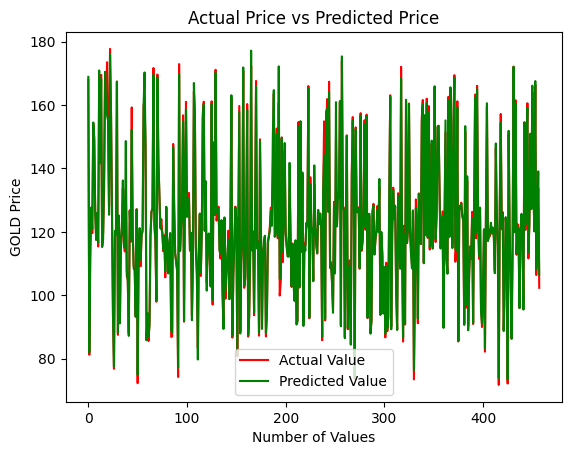

In [37]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()